# IP4: Exploratory Analysis
## Noah Clark
### v 1.0
#### DS-160-02

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
data = pd.read_csv("combine.csv")
data

combineId  playerId  combineYear combinePosition  combineHeight  \
0          10000  19870067         1987              CB           69.8   
1          10001  19870154         1987               C           74.8   
2          10002  19870800         1987              FB           71.8   
3          10003  19870121         1987               C           75.0   
4          10004  19870801         1987              WR           72.1   
...          ...       ...          ...             ...            ...   
10075      20496  20190754         2019               S           72.0   
10076      20497  20190077         2019             EDG           75.0   
10077      20498  20190110         2019               P           74.0   
10078      20499  20190755         2019               S           71.0   
10079      20500  20191010         2019               S           74.0   

       combineWeight  combineHand nameFirst     nameLast          nameFull  \
0                198         8.50   Michael        Adams     Michael Adams   
1                266        10.25      John      Adickes      John Adickes   
2                217         9.00     Tommy         Agee        Tommy Agee   
3                279        10.50     David    Alexander   David Alexander   
4                202        10.00    Lyneal       Alston     Lyneal Alston   
...              ...          ...       ...          ...               ...   
10075            209          NaN    Andrew      Wingard    Andrew Wingard   
10076            256          NaN     Chase     Winovich    Chase Winovich   
10077            218          NaN     Mitch   Wishnowsky  Mitch Wishnowsky   
10078            205          NaN   Zedrick        Woods     Zedrick Woods   
10079            212          NaN      Evan  Worthington  Evan Worthington   

       ...  hsCountry  combineArm combine40yd combineVert  combineBench  \
0      ...        NaN       30.50        4.42        32.0          13.0   
1      ...        NaN       30.00        4.97        26.5          25.0   
2      ...        NaN       30.75         NaN         NaN          15.0   
3      ...        NaN       32.75        5.13        27.5          22.0   
4      ...        NaN       33.00        4.64        32.0           7.0   
...    ...        ...         ...         ...         ...           ...   
10075  ...        NaN         NaN        4.56        36.5           9.0   
10076  ...        USA         NaN        4.59        30.5          18.0   
10077  ...  Australia         NaN        4.63        32.5           NaN   
10078  ...        NaN         NaN        4.29        34.5          19.0   
10079  ...        NaN         NaN        4.63        33.5          17.0   

       combineShuttle combineBroad  combine3cone combine60ydShuttle  \
0                4.60        118.0           NaN              11.91   
1                4.60        103.0           NaN                NaN   
2                 NaN          NaN           NaN                NaN   
3                4.33        105.0           NaN                NaN   
4                4.52        114.0           NaN              11.85   
...               ...          ...           ...                ...   
10075            4.20        121.0          7.08                NaN   
10076            4.11        116.0          6.94                NaN   
10077             NaN        117.0           NaN                NaN   
10078            4.15        122.0          7.00                NaN   
10079            4.37        121.0          7.07                NaN   

      combineWonderlic  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
10075              NaN  
10076              NaN  
10077              NaN  
10078              NaN  
10079              NaN  

[10080 rows x 35 columns]

In [10]:
data.info() #checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   combineId           10080 non-null  int64  
 1   playerId            10080 non-null  int64  
 2   combineYear         10080 non-null  int64  
 3   combinePosition     10080 non-null  object 
 4   combineHeight       10080 non-null  float64
 5   combineWeight       10080 non-null  int64  
 6   combineHand         3592 non-null   float64
 7   nameFirst           10078 non-null  object 
 8   nameLast            10078 non-null  object 
 9   nameFull            10078 non-null  object 
 10  position            10077 non-null  object 
 11  collegeId           10078 non-null  float64
 12  nflId               8993 non-null   object 
 13  college             10078 non-null  object 
 14  heightInches        10073 non-null  float64
 15  weight              10073 non-null  float64
 16  dob 

In [26]:
data.drop(['heightInches', 'weight', 'playerProfileUrl', 'position', 'collegeId', 'nflId'], axis=1, inplace=True) #removing unnecessary variables

In [27]:
data.drop(['hsCity', 'combineWonderlic'], axis=1, inplace=True)#also dropping these columns because there are too many null values

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   combineId           10080 non-null  int64  
 1   playerId            10080 non-null  int64  
 2   combineYear         10080 non-null  int64  
 3   combinePosition     10080 non-null  object 
 4   combineHeight       10080 non-null  float64
 5   combineWeight       10080 non-null  int64  
 6   combineHand         3592 non-null   float64
 7   nameFirst           10078 non-null  object 
 8   nameLast            10078 non-null  object 
 9   nameFull            10078 non-null  object 
 10  college             10078 non-null  object 
 11  dob                 8491 non-null   object 
 12  ageAtDraft          8491 non-null   float64
 13  homeCity            7522 non-null   object 
 14  homeState           7373 non-null   object 
 15  homeCountry         7569 non-null   object 
 16  high

In [29]:
data.describe() #Summary Statistics

combineId      playerId   combineYear  combineHeight  combineWeight  \
count  10080.000000  1.008000e+04  10080.000000   10080.000000   10080.000000   
mean   15089.350893  2.002596e+07   2002.561706      73.743500     240.129762   
std     2987.981163  9.639241e+04      9.642316       2.637111      44.789763   
min    10000.000000  1.987000e+07   1987.000000      64.900000     142.000000   
25%    12519.750000  1.994010e+07   1994.000000      71.900000     203.000000   
50%    15039.500000  2.002025e+07   2002.000000      74.000000     232.000000   
75%    17560.250000  2.011043e+07   2011.000000      75.800000     274.000000   
max    20500.000000  2.019103e+07   2019.000000      82.400000     387.000000   

       combineHand   ageAtDraft   combineArm  combine40yd  combineVert  \
count  3592.000000  8491.000000  3277.000000  9022.000000  8461.000000   
mean      9.504279    22.753802    32.141559     4.825943    32.061813   
std       0.647266     0.847970     1.558978     0.309737     4.203256   
min       7.130000    19.523288    25.630000     4.210000    17.500000   
25%       9.130000    22.194521    31.000000     4.580000    29.000000   
50%       9.500000    22.769863    32.130000     4.750000    32.000000   
75%      10.000000    23.289041    33.130000     5.040000    35.000000   
max      11.750000    28.553425    38.500000     6.120000    46.000000   

       combineBench  combineShuttle  combineBroad  combine3cone  \
count   7168.000000     7486.000000   8311.000000   4814.000000   
mean      19.820173        4.402701    112.538323      7.337308   
std        6.509861        0.267464      9.326537      0.443404   
min        1.000000        3.730000      7.000000      6.340000   
25%       15.000000        4.200000    106.000000      7.000000   
50%       20.000000        4.360000    113.000000      7.250000   
75%       24.000000        4.570000    119.000000      7.610000   
max       51.000000        5.680000    147.000000      9.610000   

       combine60ydShuttle  
count         1773.000000  
mean            11.741856  
std              0.433197  
min             10.580000  
25%             11.450000  
50%             11.700000  
75%             12.000000  
max             13.910000

In [30]:
data['combineYear'].value_counts() #Categorical Summary

1992    438
1991    428
1999    377
1993    338
2012    326
1990    324
1988    322
2015    322
2016    319
2017    319
1997    319
1994    315
1995    310
1989    308
2014    304
1998    303
2011    302
1996    296
2013    293
2010    287
2005    285
2009    285
2006    279
2018    278
2004    274
2019    272
2007    271
2002    270
1987    267
2008    267
2001    266
2000    258
2003    258
Name: combineYear, dtype: int64

In [31]:
data['combinePosition'].value_counts() #Categorical Summary

WR     1325
CB      976
RB      951
DE      758
OLB     750
OT      743
DT      710
TE      595
OG      595
QB      590
ILB     378
FS      375
SS      338
C       302
FB      233
LB       82
P        69
OL       62
K        61
DL       59
DB       58
S        29
EDG      21
PK       12
LS        7
NT        1
Name: combinePosition, dtype: int64

In [33]:
data['college'].value_counts().nlargest(10) #Categorical Summary

Florida State      205
Miami (FL)         202
Florida            202
USC                194
Notre Dame         188
Alabama            186
Ohio State         181
Louisiana State    175
Oklahoma           170
Nebraska           170
Name: college, dtype: int64

In [34]:
data['homeCity'].value_counts().nlargest(10) #Categorical Summary

Los Angeles    163
Houston        144
Miami          143
Dallas         102
Atlanta         97
Chicago         93
New Orleans     90
Detroit         78
San Diego       67
Washington      63
Name: homeCity, dtype: int64

In [35]:
data['homeState'].value_counts().nlargest(10) #Categorical Summary

CA    938
TX    755
FL    753
GA    420
OH    357
LA    302
PA    250
NC    249
IL    235
AL    228
Name: homeState, dtype: int64

In [36]:
data['homeCountry'].value_counts().nlargest(10) #Categorical Summary

USA        7375
Canada       28
Jamaica      27
Germany      27
Nigeria      17
UK            9
Tonga         8
Liberia       7
Haiti         6
Japan         6
Name: homeCountry, dtype: int64

In [39]:
data['highSchool'].value_counts().nlargest(10) #Categorical Summary

Central HS                     22
Hargrave Military Academy      20
St. Thomas Aquinas HS          18
Booker T. Washington HS        18
Robert E. Lee HS               16
Lincoln HS                     14
Westlake HS                    14
Miami Northwestern HS          12
Long Beach Polytechnic HS      12
Fork Union Military Academy    11
Name: highSchool, dtype: int64

In [40]:
data['hsState'].value_counts().nlargest(10) #Categorical Summary

FL    533
CA    528
TX    443
GA    248
OH    191
VA    155
LA    150
PA    144
NC    129
AL    118
Name: hsState, dtype: int64

In [41]:
data['hsCountry'].value_counts().nlargest(10) #Categorical Summary

USA          4158
Canada          8
Australia       4
Germany         1
UK              1
Name: hsCountry, dtype: int64

In [42]:
datamatrix=data.corr() #Correlation matrix
print(datamatrix)

                    combineId  playerId  combineYear  combineHeight  \
combineId            1.000000  0.998212     0.998210       0.057410   
playerId             0.998212  1.000000     0.999993       0.056432   
combineYear          0.998210  0.999993     1.000000       0.056677   
combineHeight        0.057410  0.056432     0.056677       1.000000   
combineWeight        0.105089  0.103529     0.103755       0.730371   
combineHand          0.166185  0.172233     0.173023       0.432985   
ageAtDraft          -0.070598 -0.069343    -0.069724       0.123397   
combineArm           0.332353  0.329136     0.330408       0.671157   
combine40yd         -0.138767 -0.141588    -0.142055       0.616802   
combineVert          0.199163  0.198431     0.198932      -0.408704   
combineBench         0.191149  0.191232     0.191625       0.369011   
combineShuttle      -0.045720 -0.044695    -0.045038       0.520942   
combineBroad         0.210472  0.209548     0.210033      -0.405880   
combin

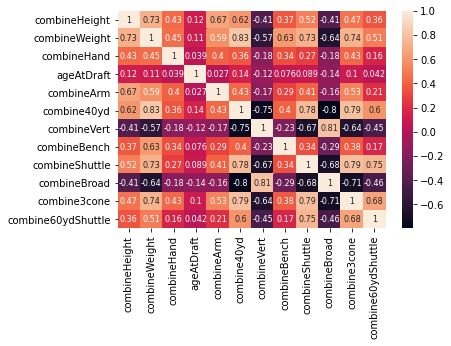

In [50]:
pc=data[['combineHeight', 'combineWeight', 'combineHand', 
         'ageAtDraft','combineArm', 'combine40yd', 
        'combineVert', 'combineBench', 'combineShuttle', 
        'combineBroad', 'combine3cone', 'combine60ydShuttle']].corr(method='pearson')
cols=['combineHeight', 'combineWeight', 'combineHand', 
         'ageAtDraft','combineArm', 'combine40yd', 
        'combineVert', 'combineBench', 'combineShuttle', 
        'combineBroad', 'combine3cone', 'combine60ydShuttle']
ax=sns.heatmap(pc, annot=True, yticklabels=cols, xticklabels=cols, 
              annot_kws={'size': 8})

#Heatmap

<AxesSubplot:ylabel='Count'>

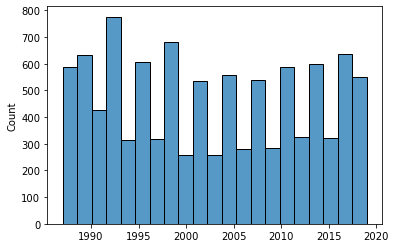

In [88]:
yearhist=data['combineYear'].values
sns.histplot(yearhist)
#Distribution

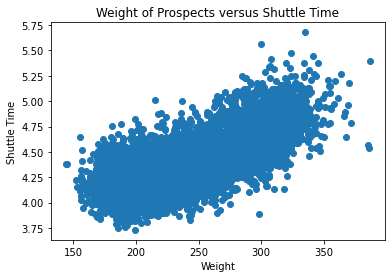

In [68]:
plt.scatter(data["combineWeight"],data["combineShuttle"] )
plt.title("Weight of Prospects versus Shuttle Time")
plt.xlabel('Weight')
plt.ylabel('Shuttle Time')
plt.show()

#Scatter

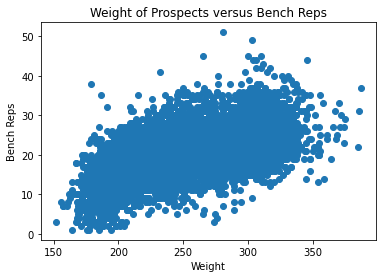

In [85]:
plt.scatter(data["combineWeight"],data["combineBench"] )
plt.title("Weight of Prospects versus Bench Reps")
plt.xlabel('Weight')
plt.ylabel('Bench Reps')
plt.show()

#Scatter

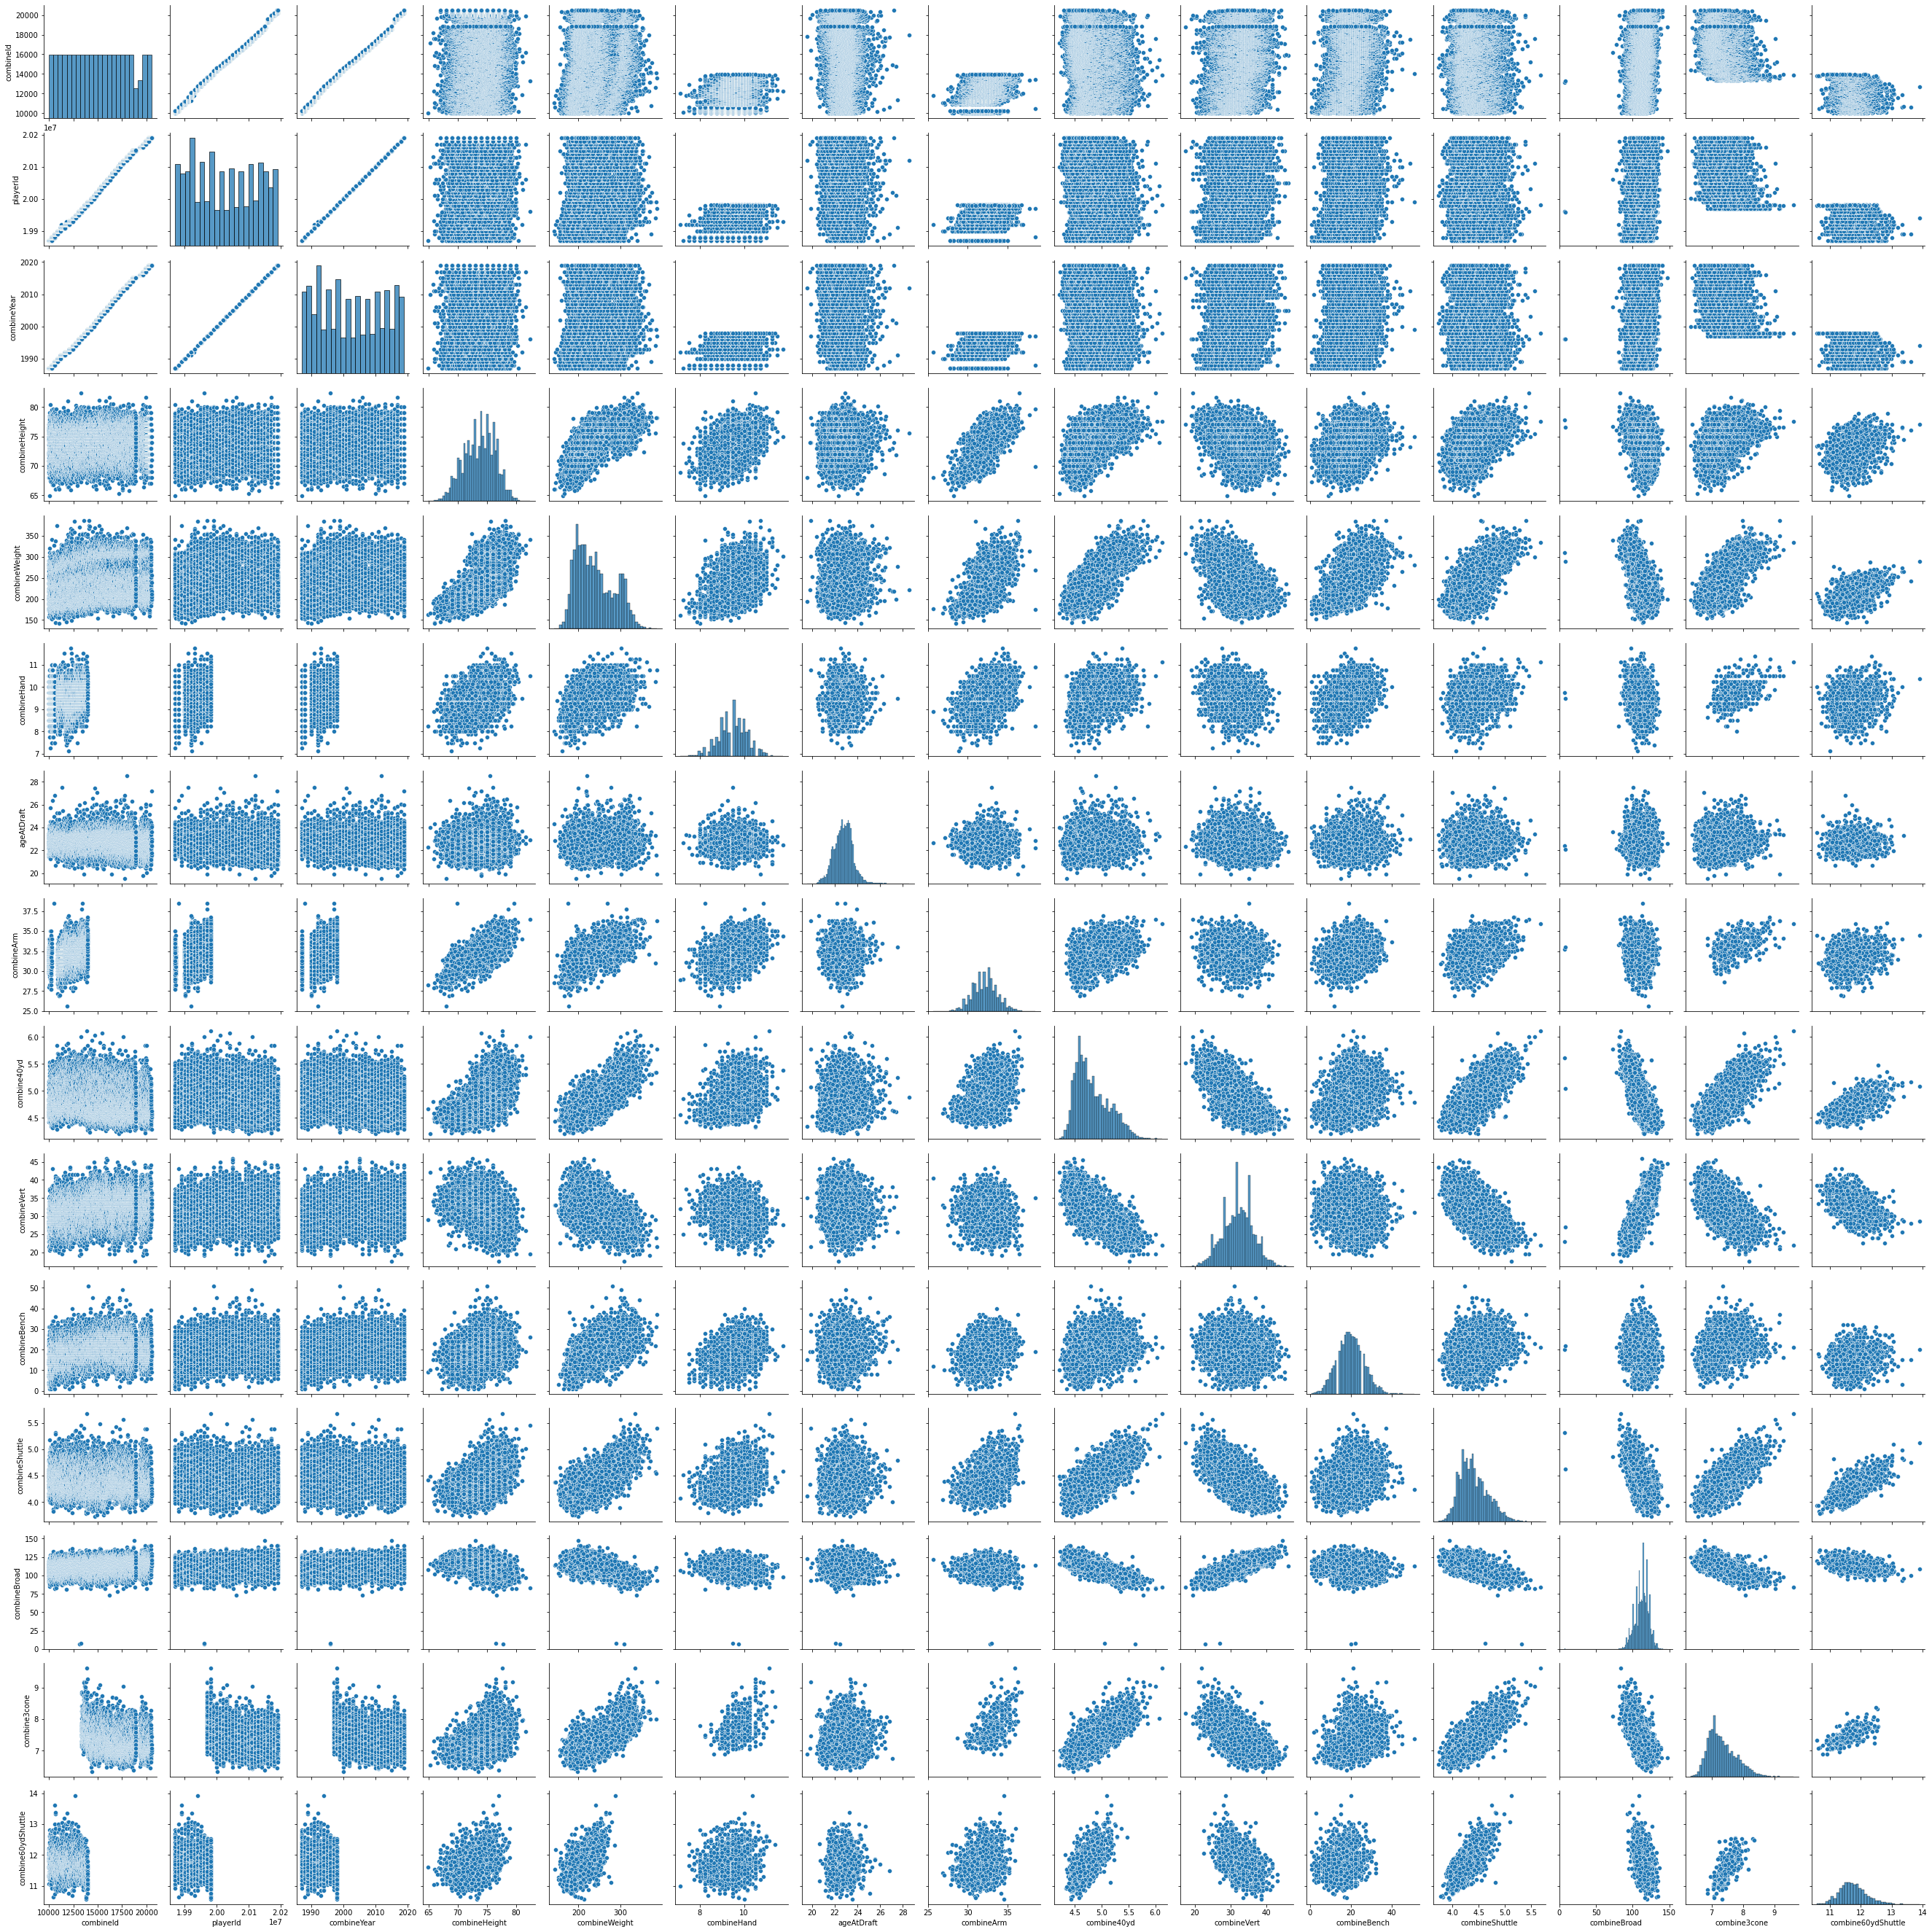

In [73]:
pairplot=sns.pairplot(data)

#Pairplot

barplot=sns.barplot(x='hsCountry', y='combineVert', data=data, ci=False)


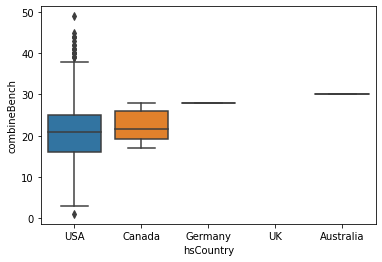

In [80]:
boxplot1=sns.boxplot(x='hsCountry', y='combineBench', data=data)